## Code: Movie Recomemmender System using NLP

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
# Read movies dataset

df = pd.read_csv('../data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Analyze row structure of the dataset, displaying the first row

x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [4]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [5]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [6]:
# For usability, convert the json documents of 'genre' to a list of python dictionaries
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [7]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [8]:
# Create a method to convert the relevant data for each movie into a single string
# to be fed into TfIdfVectorizer
def to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(k['name'].split()) for k in keywords)

    return f"{genres} {keywords}"

In [9]:
# Create a new string representation of each movie
df['string'] = df.apply(to_string, axis=1)
df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [10]:
# Create a TfIdfVectorizer object
tfidf = TfidfVectorizer(max_features=2000) # max-features limits the number of columns in the final matrix

In [11]:
# Creata a datamatrix from the overviews
X = tfidf.fit_transform(df['string'])

In [12]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [13]:
# Generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [14]:
idx = movie2idx['John Carter']
idx

4

In [15]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [16]:
# Print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# Compute similarity bewtween query and every vector in X
scores = cosine_similarity(query, X)
scores = scores.flatten()
scores

array([0.19230894, 0.02416566, 0.1089219 , ..., 0.        , 0.        ,
       0.        ])

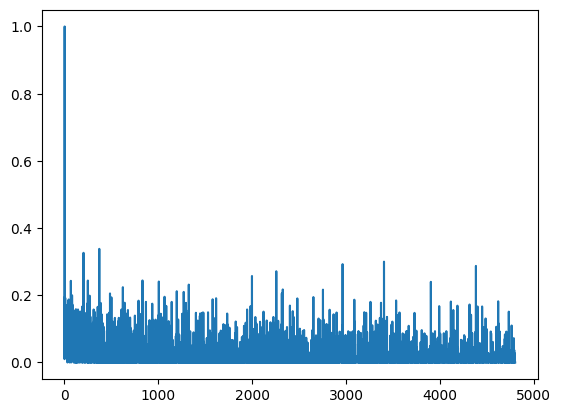

In [18]:
# Plot the scores
plt.plot(scores);

In [19]:
# Sort the scores in descending order
(-scores).argsort() # Not sorting the scores, but the movies themselves

array([   4,  373,  205, ..., 2378, 2364, 4802], dtype=int64)

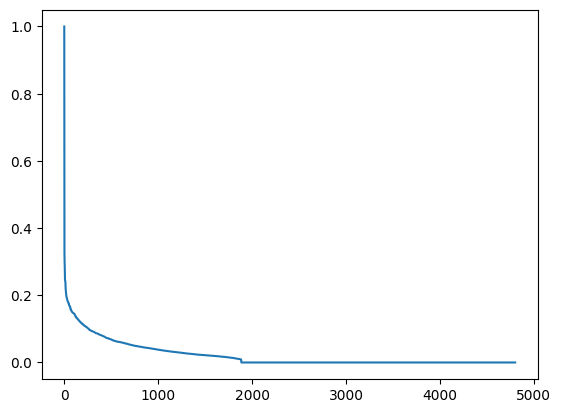

In [20]:
# Plot the sorted movies
plt.plot(scores[(-scores).argsort()]);

In [21]:
# Get top 5 matches (excluding the query itself, obviously!)
recommended_idx = (-scores).argsort()[1:6]
recommended_idx


array([ 373,  205, 3405, 2964, 4384], dtype=int64)

In [22]:
# Convert indices back to titles
df['title'].iloc[recommended_idx]

373                        Mission to Mars
205     Sherlock Holmes: A Game of Shadows
3405            Stargate: The Ark of Truth
2964                 The Last Days on Mars
4384                           Guiana 1838
Name: title, dtype: object

In [32]:
# Create a function to perform all the above tasks at once
def recommend(title):
    # Get the row in the dataframe for the query movie
    idx = movie2idx[title]
    # If the returned idx is a series of titles, select only one, let's say the first index (all indices return same title)
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    # Calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)
    scores = scores.flatten()

    # Sort the scores in descending order
    (-scores).argsort() # Not sorting the scores, but the movies themselves

    # Get top 5 matches (excluding the query itself, obviously!)
    recommended_idx = (-scores).argsort()[1:6]
    recommended_idx

    # Convert indices back to titles
    return df['title'].iloc[recommended_idx]

In [37]:
# Return recommendations
title = 'Scream 3'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "Scream 3":


3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [38]:
# Return recommendations
title = 'Avatar'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "Avatar":


47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object

In [39]:
# Return recommendations
title = 'John Carter'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "John Carter":


373                        Mission to Mars
205     Sherlock Holmes: A Game of Shadows
3405            Stargate: The Ark of Truth
2964                 The Last Days on Mars
4384                           Guiana 1838
Name: title, dtype: object